# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [2]:
data = pd.read_csv("absences.csv")

In [3]:
data.head()

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9


In [4]:
list1 = list(data.Age)

In [5]:
list1

[27, 61, 37, 23, 46, 58, 29, 36, 64, 40]

In [6]:
list2 = list(data.Absences)

In [7]:
list2

[15, 6, 10, 18, 9, 7, 14, 11, 5, 8]

In [8]:
data = data.drop(columns=['Unnamed: 0'])

In [9]:
data.head()

,EmployeeID,Age,Absences
0,1,27,15
1,2,61,6
2,3,37,10
3,4,23,18
4,5,46,9


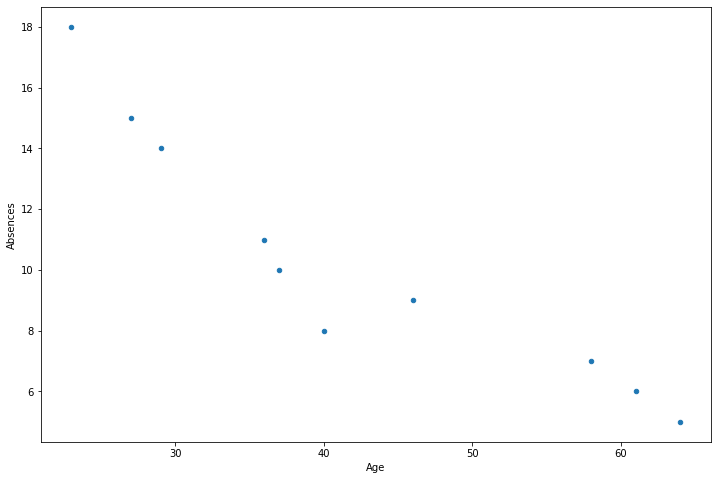

In [10]:
data.plot.scatter(x='Age',y='Absences', figsize=(12,8))

In [11]:
# From the scatter plot, you can see that the older the person, the less the number of absences.

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

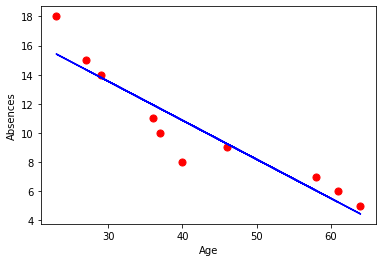

'The intercept = 21.58738189891065 & The slope = -0.26810883370334077'

In [12]:
def The_function(x, y):
    deviation_xy = sum(y*x) - (len(x)*(sum(x)/len(x))*(sum(y)/len(y)))
    deviation_xx = sum(x*x) - (len(x)*(sum(x)/len(x))*(sum(x)/len(x)))
  
    deviation_Coefficient_1 = deviation_xy / deviation_xx 
    deviation_Coefficient_2 = (sum(y)/len(y)) - deviation_Coefficient_1*(sum(x)/len(x))
    
    plt.scatter(x, y, color = "r", marker = "o", s = 50) 
    predicted_y = deviation_Coefficient_2 + deviation_Coefficient_1 * x 
    plt.plot(x, predicted_y, color = "b") 
    plt.xlabel('Age') 
    plt.ylabel('Absences') 
    plt.show() 
    
    return f"The intercept = {deviation_Coefficient_2} & The slope = {deviation_Coefficient_1}"
The_function(data['Age'], data['Absences'])

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

The slope is: -0.2681088337033404
The intercept is: 21.58738189891063


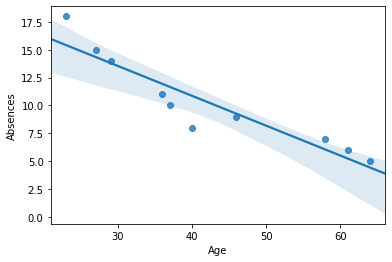

In [13]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Age'], data['Absences'])
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
sns.regplot(x='Age',y='Absences', data=data)

In [14]:
# From the plot above, we can clearly see that the slope of the regression line is negative.

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [15]:
def covariance(x, y):
    x_mean = (sum(x)/len(x))
    y_mean = (sum(y)/len(y))
    data = [(x[i] - x_mean) * (y[i] - y_mean) for i in range(len(x))]
    return sum(data) / (len(data) - 1)

In [16]:
def correlation(x, y):
    std1 = x.std()
    std2 = y.std()
    corr = (covariance(x, y)/(std1*std2))
    return corr

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [17]:
covariance(data['Absences'], data['Age'])

-57.699999999999996

In [18]:
correlation(data['Absences'], data['Age'])

-0.9325434092481012

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [19]:
"""
 “Covariance” the covarience is negative (-57), which means that as x increases y tend to decrease.
 “Correlation” the correlation is negative (-0.932543), which means that the age and the absecnce are negativly correlated.
 And because the correlation is almost close from -1, this means that there is a strong correlation between the two variables.
 
 For the two statements above, it is very clear that the hypothesis is correct and that the younger the employees,
 they are more likely to have higher absences and vice versa, the older the employees, the lower the absence.
"""

'\n “Covariance” the covarience is negative (-57), which means that as x increases y tend to decrease.\n “Correlation” the correlation is negative (-0.932543), which means that the age and the absecnce are negativly correlated.\n And because the correlation is almost close from -1, this means that there is a strong correlation between the two variables.\n \n For the two statements above, it is very clear that the hypothesis is correct and that the younger the employees,\n they are more likely to have higher absences and vice versa, the older the employees, the lower the absence.\n'

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [20]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [21]:
covariance(ironbeers_df['X'], ironbeers_df['Y'])

12.0

In [22]:
correlation(ironbeers_df['X'], ironbeers_df['Y'])

0.9770084209183943

In [23]:
"""
 “Covariance” the covarience is positive (12), which means that as X increases Y tend to increase as well.
 “Correlation” the correlation is positive (0.977008), which means that the the number of people that you told to stay and
 the number of people that actually stayed are positivly correlated.
 And because the correlation is almost close from 1, this means that there is a strong correlation between the two variables.
 
 For the two statements above, it is very clear that the hypothesis is correct and that the the more people that you ask to stay
 the more probability they will actually stay. 
"""

'\n “Covariance” the covarience is positive (12), which means that as X increases Y tend to increase as well.\n “Correlation” the correlation is positive (0.977008), which means that the the number of people that you told to stay and\n the number of people that actually stayed are positivly correlated.\n And because the correlation is almost close from 1, this means that there is a strong correlation between the two variables.\n \n For the two statements above, it is very clear that the hypothesis is correct and that the the more people that you ask to stay\n the more probability they will actually stay. \n'

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

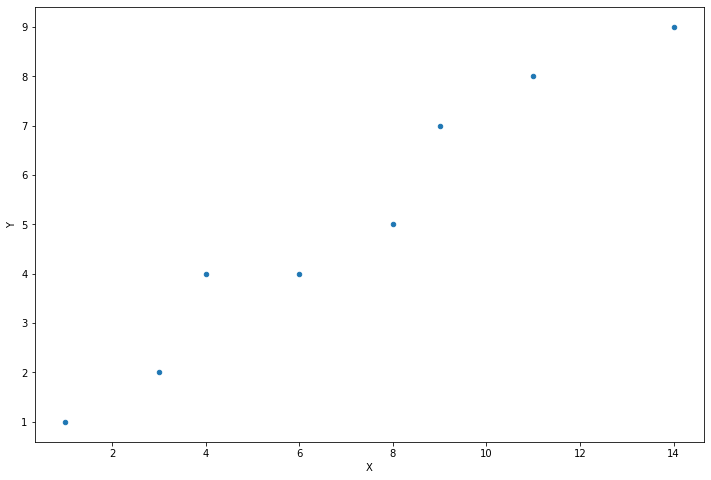

In [24]:
ironbeers_df.plot.scatter(x='X',y='Y', figsize=(12,8))

In [25]:
# From the scatter plot, you can see that the higher the number of people that you ask to stay,
#the higher the number of people that actually stay.

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

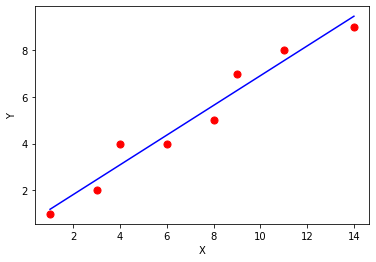

'The intercept = 0.5454545454545459 & The slope = 0.6363636363636364'

In [26]:
def The_function_(x, y):
    deviation_xy = sum(y*x) - (len(x)*(sum(x)/len(x))*(sum(y)/len(y)))
    deviation_xx = sum(x*x) - (len(x)*(sum(x)/len(x))*(sum(x)/len(x)))
  
    deviation_Coefficient_1 = deviation_xy / deviation_xx 
    deviation_Coefficient_2 = (sum(y)/len(y)) - deviation_Coefficient_1*(sum(x)/len(x))
    
    plt.scatter(x, y, color = "r", marker = "o", s = 50) 
    predicted_y = deviation_Coefficient_2 + deviation_Coefficient_1 * x 
    plt.plot(x, predicted_y, color = "b") 
    plt.xlabel('X') 
    plt.ylabel('Y') 
    plt.show() 
    
    return f"The intercept = {deviation_Coefficient_2} & The slope = {deviation_Coefficient_1}"
The_function_(ironbeers_df['X'], ironbeers_df['Y'])

In [27]:
# From the plot above, we can clearly see that the slope of the regression line is positive.

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [28]:
#The correlation is that the more people I ask to stay the more likely they will stay.
#So I guess I have to ask more and more people :D

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [29]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [30]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [31]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [32]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [33]:
# your code here

In [34]:
# your comments here